In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from  sklearn.preprocessing import LabelEncoder

In [55]:
company=pd.read_csv("Company_Data.csv")
company2=company.iloc[:,0:7]
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,Bad
1,11.22,111,48,16,260,83,Good
2,10.06,113,35,10,269,80,Medium
3,7.40,117,100,4,466,97,Medium
4,4.15,141,64,3,340,128,Bad
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good
396,6.14,139,23,3,37,120,Medium
397,7.41,162,26,12,368,159,Medium
398,5.94,100,79,7,284,95,Bad


In [56]:
labelenocer=LabelEncoder()
(company2['ShelveLoc'])=labelenocer.fit_transform(company2['ShelveLoc'])

In [61]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [62]:
company2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,9.50,138,73,11,276,120,0
1,11.22,111,48,16,260,83,1
2,10.06,113,35,10,269,80,2
3,7.40,117,100,4,466,97,2
4,4.15,141,64,3,340,128,0
...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1
396,6.14,139,23,3,37,120,2
397,7.41,162,26,12,368,159,2
398,5.94,100,79,7,284,95,0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(company2.iloc[:,0:6])
df_norm.tail(10)

,Sales,CompPrice,Income,Advertising,Population,Price
390,0.336202,0.316327,0.545455,0.310345,0.102204,0.520958
391,0.374923,0.775510,0.424242,0.000000,0.078156,0.598802
392,0.278427,0.530612,0.212121,0.448276,0.611222,0.634731
393,0.342348,0.326531,0.303030,0.344828,0.032064,0.574850
394,0.328826,0.540816,0.373737,0.655172,0.713427,0.688623
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150
399,0.596804,0.581633,0.161616,0.000000,0.034068,0.574850


In [65]:
company5=company2.iloc[:,6]
company5

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

In [66]:
company3=pd.concat([df_norm,company5],axis=1)
company3

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,2
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,2
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0
...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,1
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,2
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,2
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0


In [67]:
x5=company3.iloc[:,0:6]
y5=company3.iloc[:,6]

In [68]:
x5

,Sales,CompPrice,Income,Advertising,Population,Price
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754
...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150


In [69]:
y5

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int32

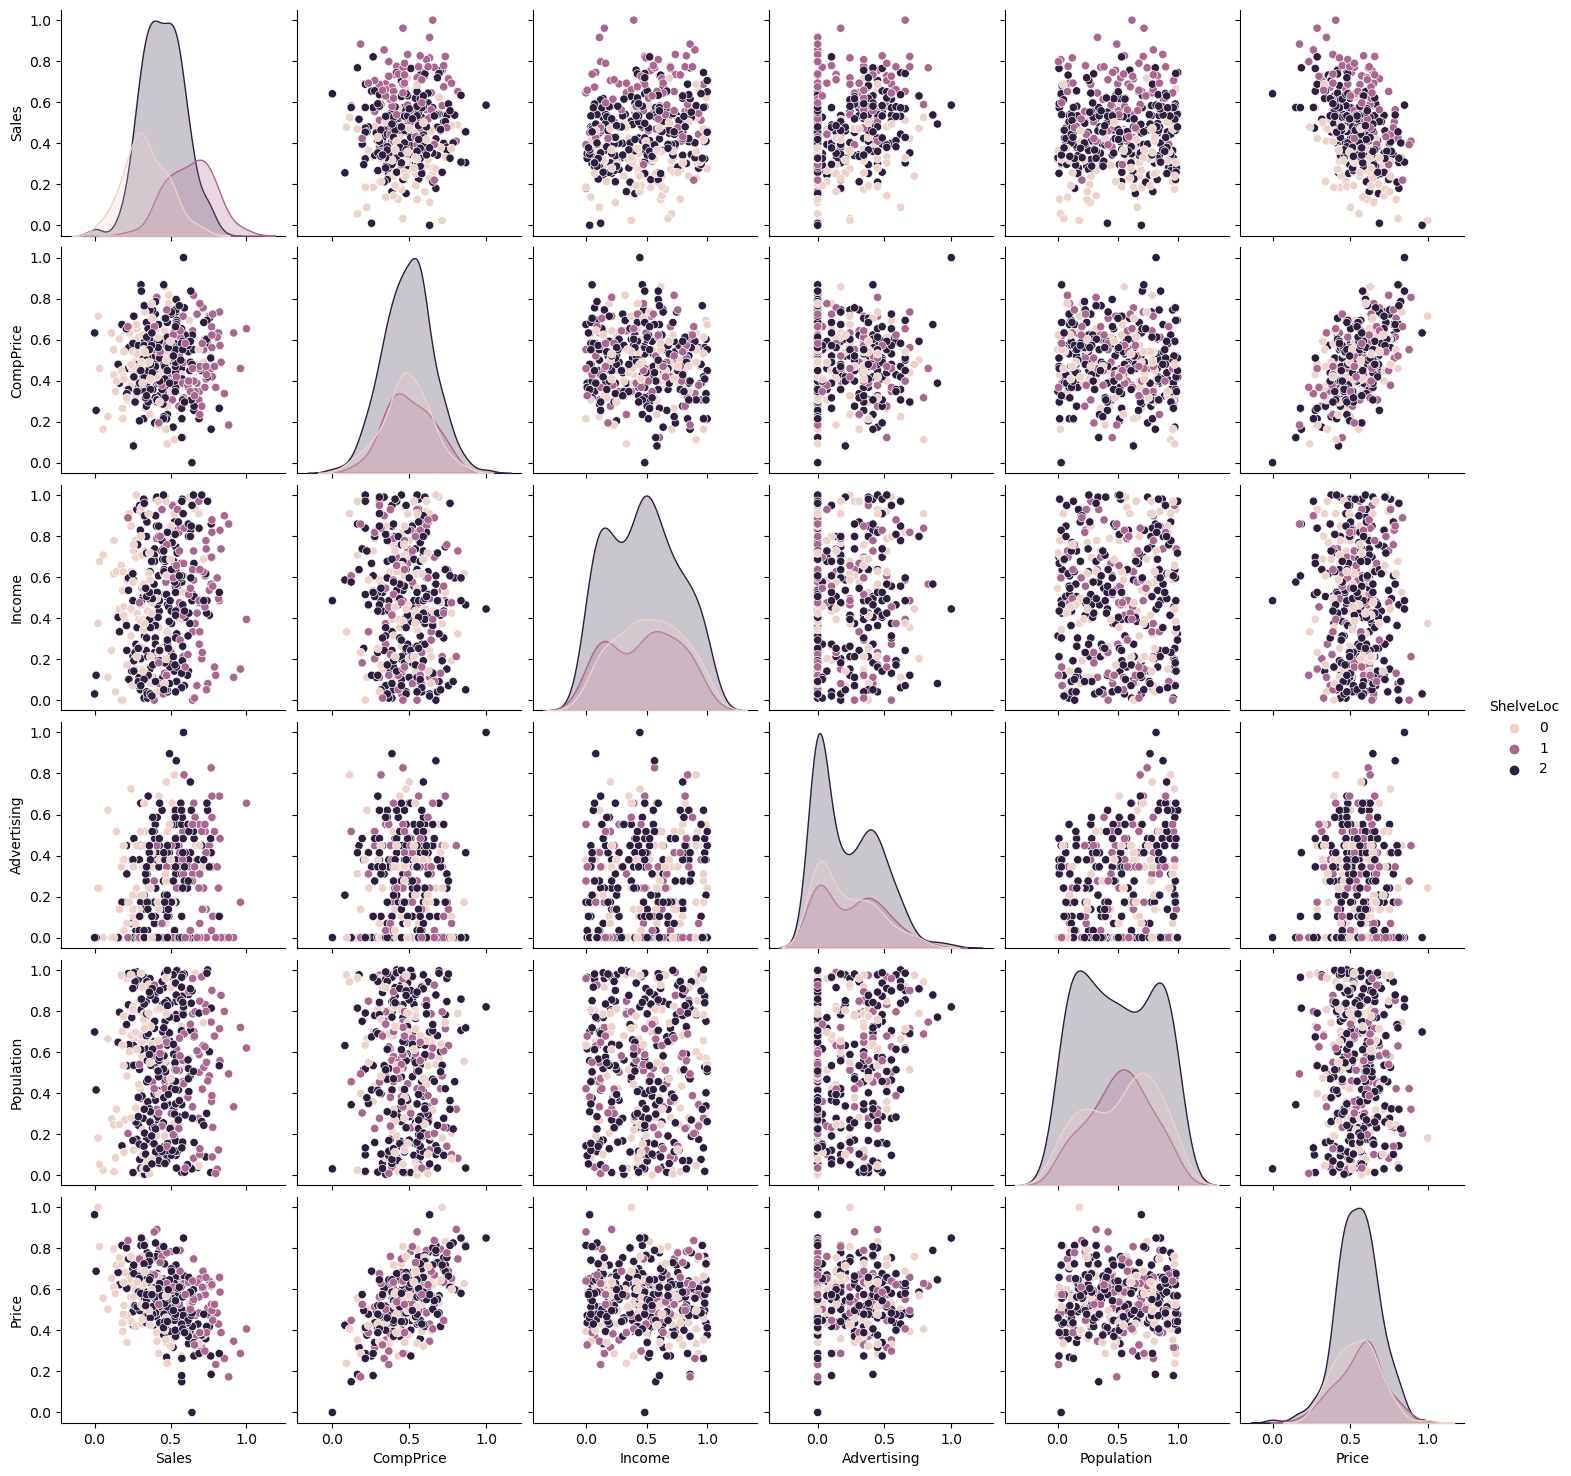

In [72]:
import seaborn as sns
sns.pairplot(data=company3, hue = 'ShelveLoc')

In [73]:
X5train, X5test, y5train, y5test = train_test_split(x5,y5, test_size=0.2, random_state=0)

In [74]:
model5=DecisionTreeClassifier(criterion ='entropy',max_depth=3)

In [75]:
model5.fit(X5train,y5train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [76]:
preds5=model5.predict(X5test)

In [77]:
np.mean(preds5==y5test)*100

58.75

In [78]:
print(classification_report(preds5,y5test))

              precision    recall  f1-score   support

           0       0.28      0.38      0.32        13
           1       0.52      0.73      0.61        15
           2       0.76      0.60      0.67        52

    accuracy                           0.59        80
   macro avg       0.52      0.57      0.53        80
weighted avg       0.63      0.59      0.60        80



In [79]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [80]:
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model5,x5,y5,cv=Kfold)
print(results.mean()*100)

61.5


\# 1.Bagged Decision Tree for Classifie

In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [82]:
# 100 parallel model thats why n_estimators=100
Kfold =    KFold(n_splits=10)
cart  =    DecisionTreeClassifier()
model6 =    BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=7)
results=   cross_val_score(model6,x5,y5,cv=Kfold)
print(results.mean()*100)

C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

65.0


# 2.XGB Classifier

In [83]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
#fit model to training data because we already did train test splitt above
model7 = XGBClassifier()
model7.fit(X5train,y5train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [85]:
# get score
result = model7.score(X5test,y5test)
result*100

61.25000000000001

# Q-2 Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not

In [86]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [87]:
df = pd.read_csv("Fraud_check.csv")

In [88]:
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [89]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [90]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10000,30000,99620], labels = ["Risky", "Good"])

In [91]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [92]:
df1=pd.get_dummies(df)
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,TaxInc_Risky,TaxInc_Good
0,68833,50047,10,1,0,0,0,1,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1,0,1
2,36925,160205,30,1,0,0,1,0,0,1,0,1
3,50190,193264,15,0,1,0,0,1,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0,1
596,69967,55369,2,0,1,1,0,0,0,1,0,1
597,47334,154058,0,1,0,1,0,0,0,1,0,1
598,98592,180083,17,0,1,0,1,0,1,0,0,1


In [93]:
df1.drop(df1.columns[[3,5,8,10]],axis=1,inplace=True)

In [94]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


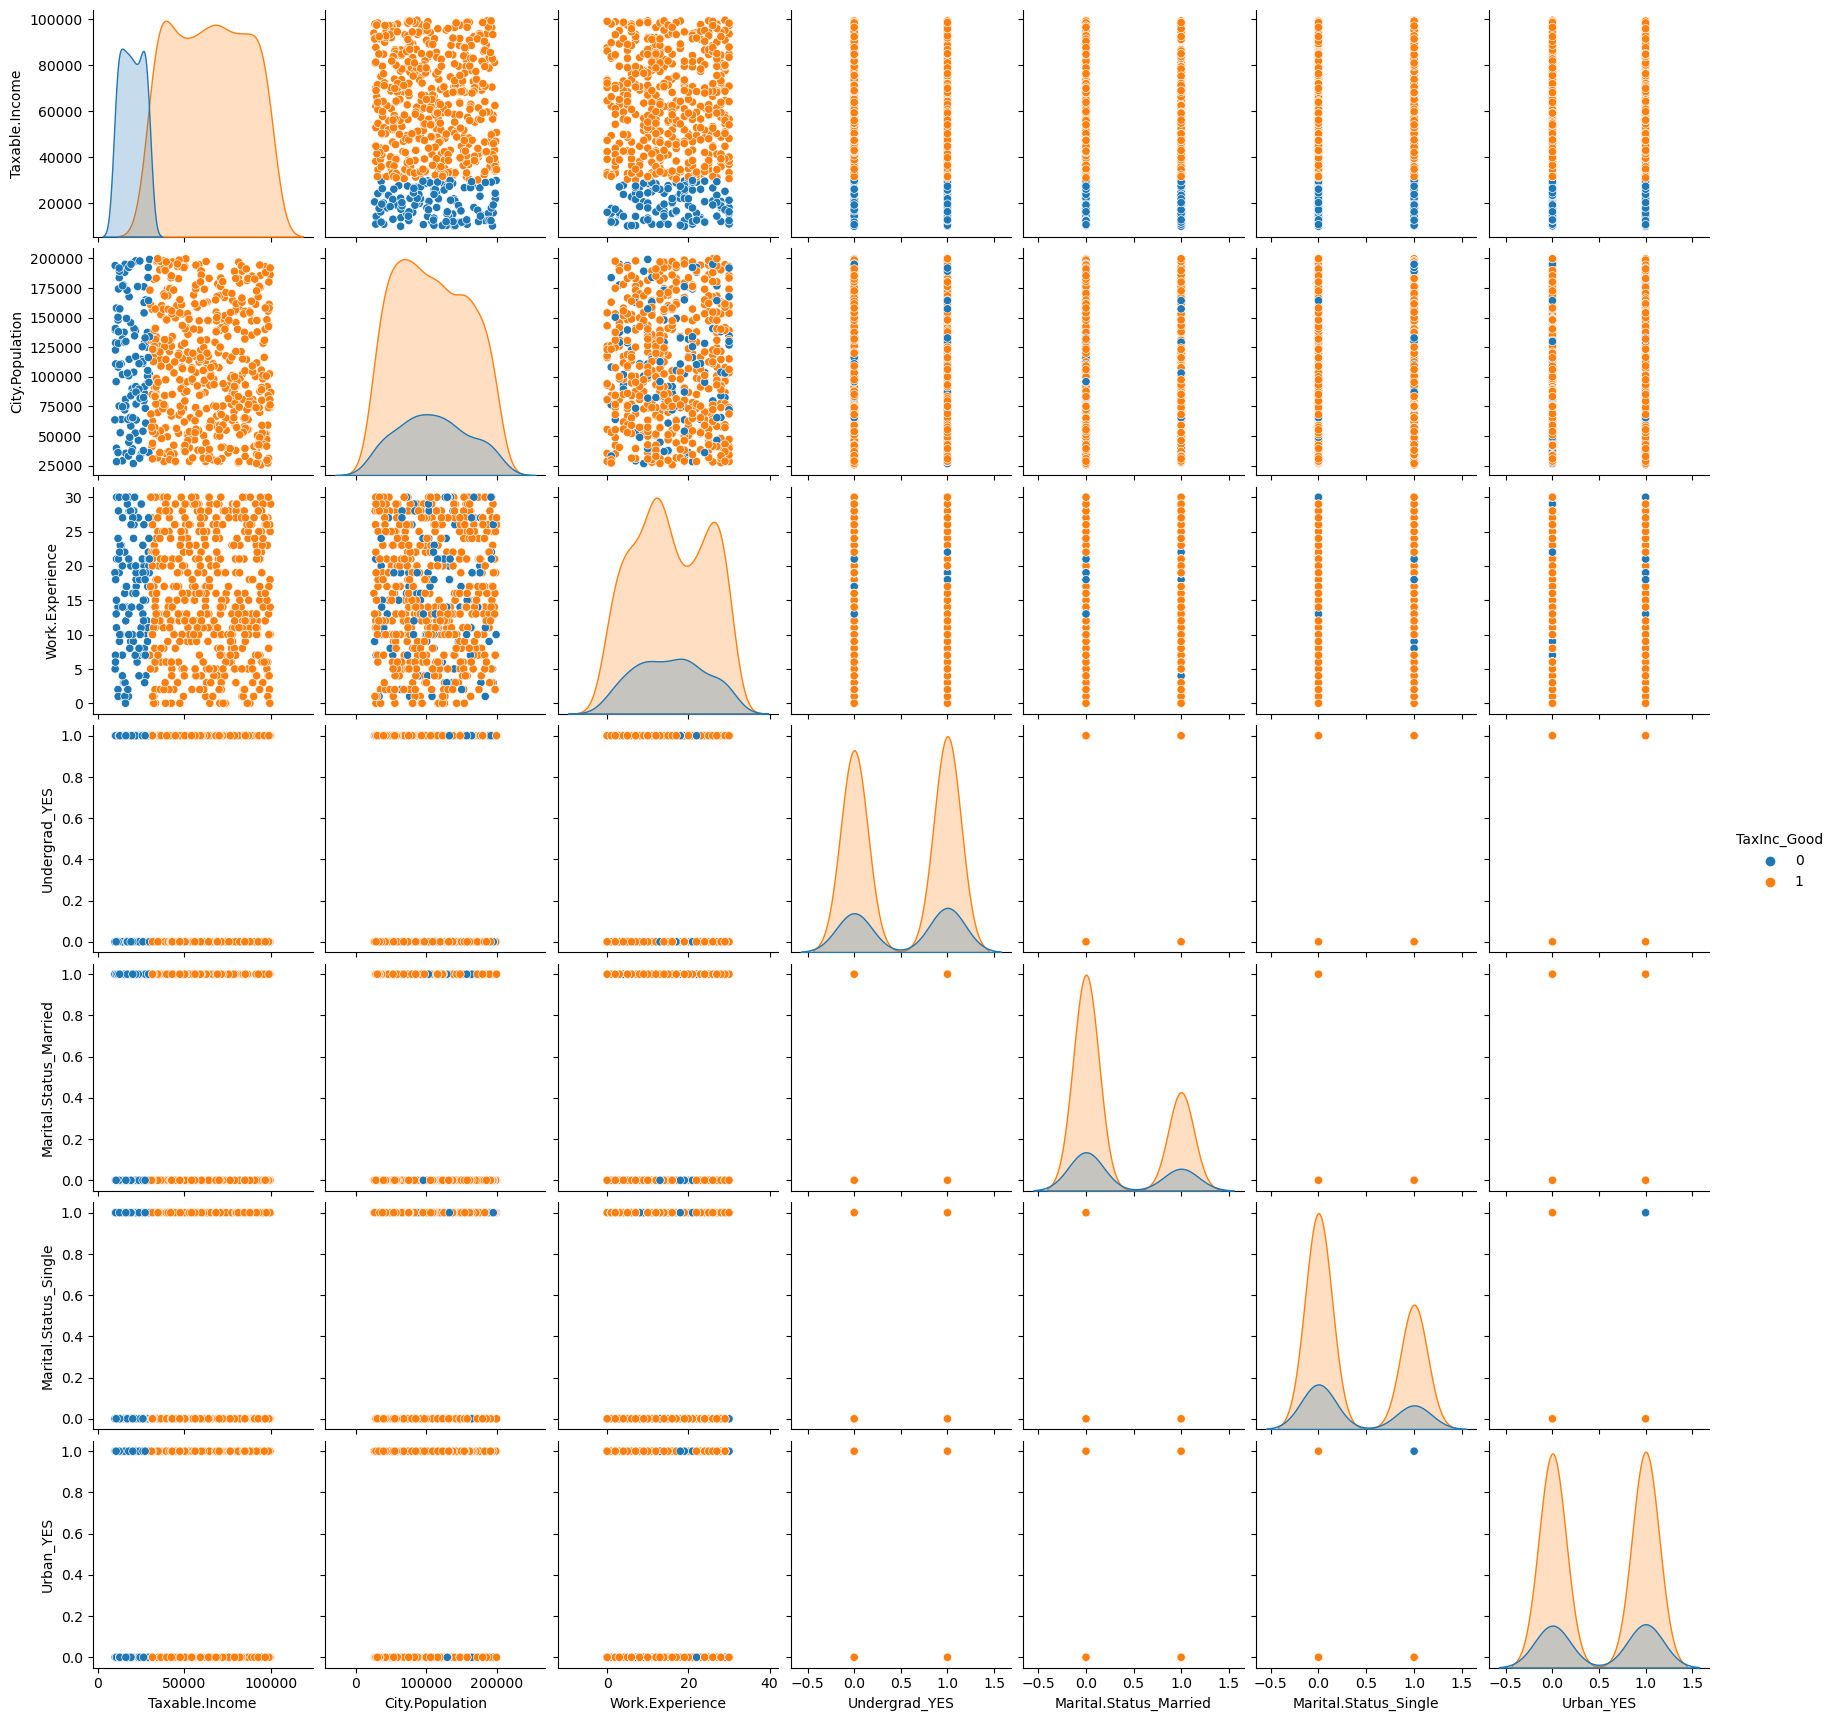

In [95]:
import seaborn as sns
sns.pairplot(data=df1, hue = 'TaxInc_Good')

In [96]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [97]:
df_norm = norm_func(df1.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [98]:
X1 = df_norm.drop(['TaxInc_Good'], axis=1)
y1 = df_norm['TaxInc_Good']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X1

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [101]:
y1

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
595    1.0
596    1.0
597    1.0
598    1.0
599    1.0
Name: TaxInc_Good, Length: 600, dtype: float64

In [102]:
X1train, X1test, y1train, y1test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [103]:
model6=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model6.fit(X1train,y1train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [104]:
preds6=model6.predict(X1test)

In [105]:
pd.Series(preds6).value_counts

<bound method IndexOpsMixin.value_counts of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Length: 120, dtype: float64>

In [106]:
np.mean(preds6==y1test)*100

78.33333333333333

In [107]:
print(classification_report(preds6,y1test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      0.79      0.88       119

    accuracy                           0.78       120
   macro avg       0.49      0.39      0.44       120
weighted avg       0.98      0.78      0.87       120



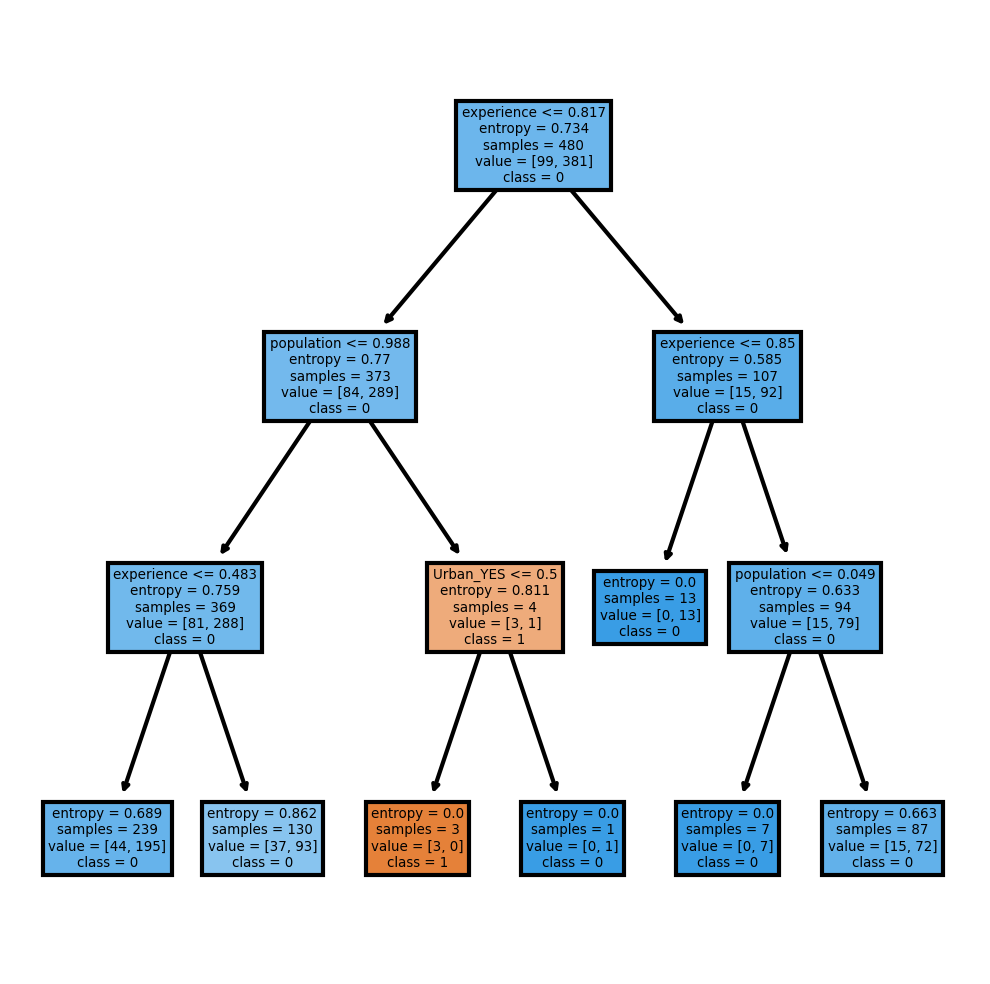

In [108]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model6,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [109]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [110]:
Kfold =    KFold(n_splits=10)
model3 =   RandomForestClassifier(n_estimators=100,max_features=3)
results=   cross_val_score(model3,X1,y1,cv=Kfold)
print(results.mean()*100)

73.83333333333333


# 1.Bagged Decision Tree for Classifie

In [111]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [112]:
Kfold =    KFold(n_splits=10)
cart  =    DecisionTreeClassifier()
model6 =    BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=7)
results=   cross_val_score(model6,X1,y1,cv=Kfold)
print(results.mean()*100)

C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  

72.66666666666666


# 2.XGB Classifier

In [113]:
!pip install xgboost
from xgboost import XGBClassifier

In [114]:
model8 = XGBClassifier()
model8.fit(X1train,y1train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [115]:
model9 = XGBClassifier()
model9.fit(X1train,y1train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [116]:
result = model9.score(X1test,y1test)
result*100

73.33333333333333